##Samarth Motka
##202311023

##DIP_LAB_1
##17/1/2024


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Question 1.
Up-sample and down-sample the image of Figure 1 by scale factor 4. Discuss the effect
of changing sampling rate. Also observe the effect of different quantization levels (L =2,
4, 8, 16, 32, 64, 128, 256) for this image. (Figure 1 image : fig1.jpg)

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
house = cv2.imread("/content/drive/MyDrive/Daiict/sem2/DIP/lab_1/building.jpg", cv2.IMREAD_GRAYSCALE)
house.shape

(400, 534)

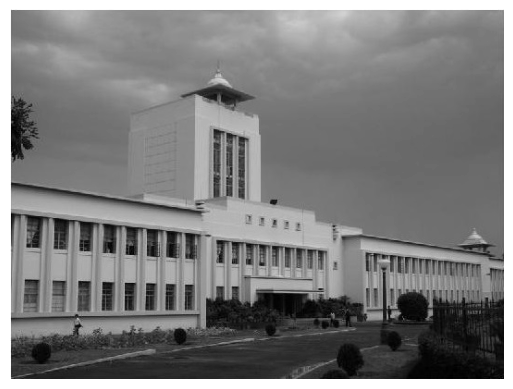

In [86]:
plt.imshow(house,cmap='gray')
plt.axis('off')
plt.show()

##Up-sampling Algorithms:

In [87]:
new_size = (int(534 * 4), int(400 * 4))
new_size

(2136, 1600)

###Nearest-neighbor Interpolation:


*   For each pixel in the original image, the nearest-neighbor algorithm simply
    replicates the pixel value to generate the new pixels in the enlarged image.

*   It's a straightforward method but can result in blocky and jagged artifacts.





In [88]:
upscaled = cv2.resize(house, new_size, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)

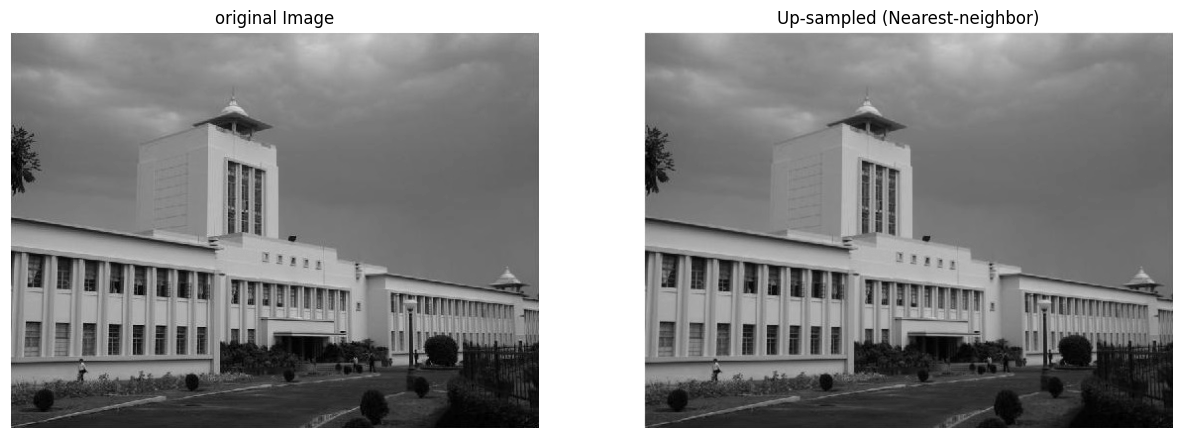

In [89]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(house,cmap='gray')
plt.axis('off')
plt.title('original Image')

plt.subplot(1, 2, 2)
plt.imshow(upscaled_house,cmap='gray')
plt.axis('off')
plt.title('Up-sampled (Nearest-neighbor)')

plt.show()

###Bilinear Interpolation:
* Bilinear interpolation takes into account the nearest four pixels (2x2 neighborhood) in the original image and computes the weighted average to assign values to the new pixels.

* It produces smoother results compared to nearest-neighbor interpolation.

In [90]:
upscaled_house_bilinear = cv2.resize(house, new_size, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)

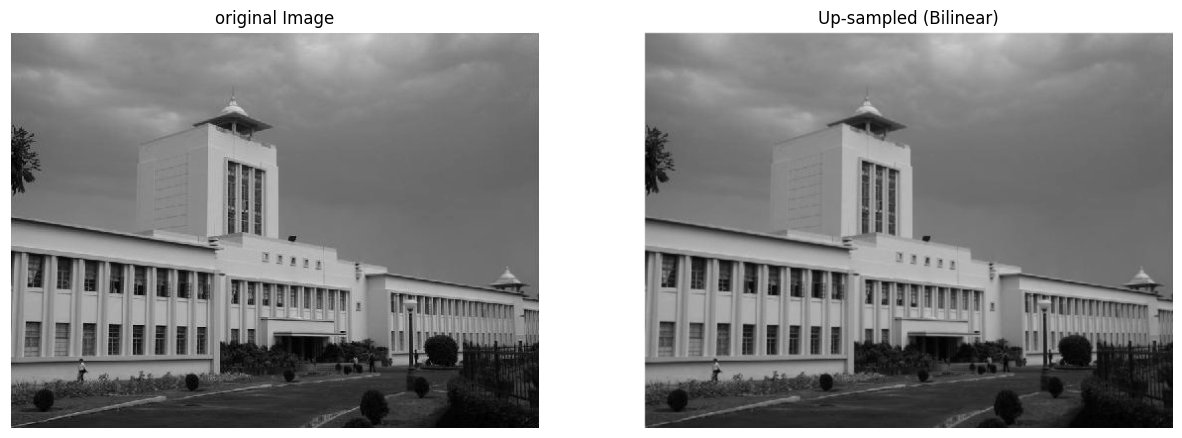

In [91]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(house,cmap='gray')
plt.axis('off')
plt.title('original Image')

plt.subplot(1, 2, 2)
plt.imshow(upscaled_house_bilinear,cmap='gray')
plt.axis('off')
plt.title('Up-sampled (Bilinear)')

plt.show()

## Down-sampling Algorithms

### Nearest-neighbor Decimation:
* For each pixel in the down-sampled image, the nearest-neighbor algorithm simply takes the value of the corresponding pixel in the original image.

* Similar to up-sampling, it can lead to loss of information and blocky artifacts.

In [92]:
downscaled = cv2.resize(house, None, fx=1/4, fy=1/4, interpolation=cv2.INTER_NEAREST)

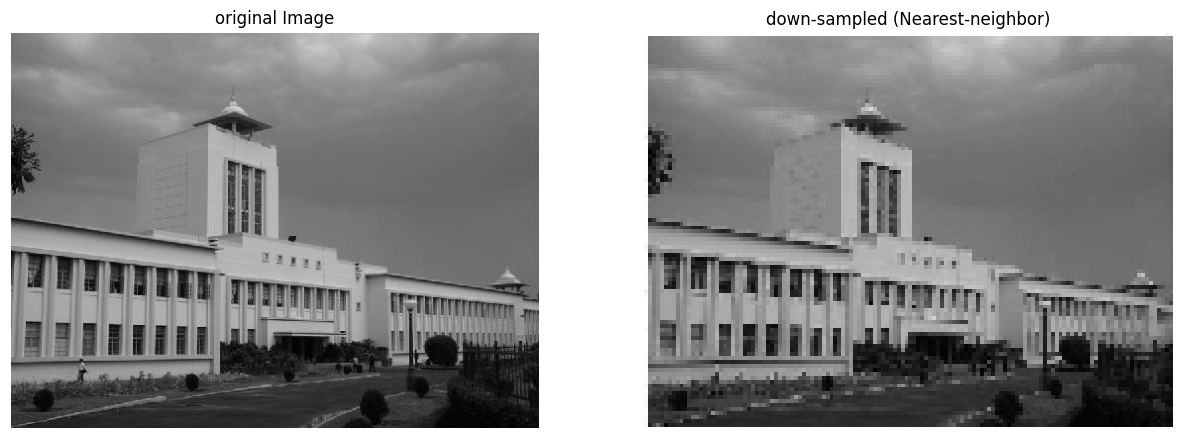

In [93]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(house,cmap='gray')
plt.axis('off')
plt.title('original Image')

plt.subplot(1, 2, 2)
plt.imshow(downscaled,cmap='gray')
plt.axis('off')
plt.title('down-sampled (Nearest-neighbor)')

plt.show()

### Bilinear Decimation:

* Bilinear decimation also considers a 2x2 neighborhood in the original image, computing a weighted average to assign values to the down-sampled pixels.

* It can produce smoother results compared to nearest-neighbor decimation.

In [94]:
downscaled_house_bilinear = cv2.resize(house, None, fx=1/4, fy=1/4, interpolation=cv2.INTER_LINEAR)

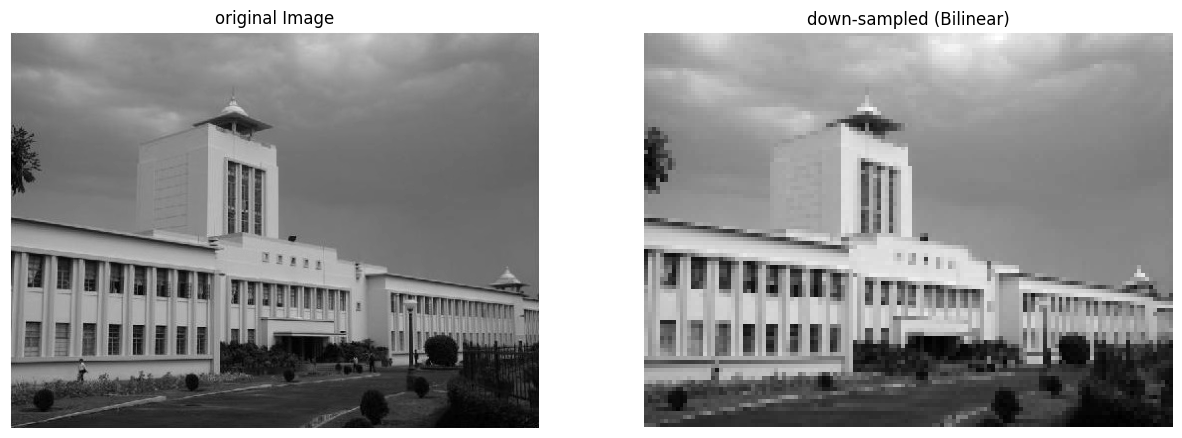

In [95]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(house,cmap='gray')
plt.axis('off')
plt.title('original Image')

plt.subplot(1, 2, 2)
plt.imshow(downscaled_house_bilinear,cmap='gray')
plt.axis('off')
plt.title('down-sampled (Bilinear)')

plt.show()

## Quantization

The quantization formula determines how continuous intensity values are mapped to discrete levels during the quantization process. The formula typically involves rounding and scaling to map the original intensity values to a limited set of discrete levels.

In [96]:
def quantize_image(image, levels):
    quantized_image = np.round((image * ((levels - 1 )/255 )))*(255/(levels - 1 ))
    return quantized_image.astype(np.uint8)

In [97]:
quantization_levels = [2, 4, 8, 16, 32, 64, 128, 256]
quantized_images = [quantize_image(house, levels) for levels in quantization_levels]

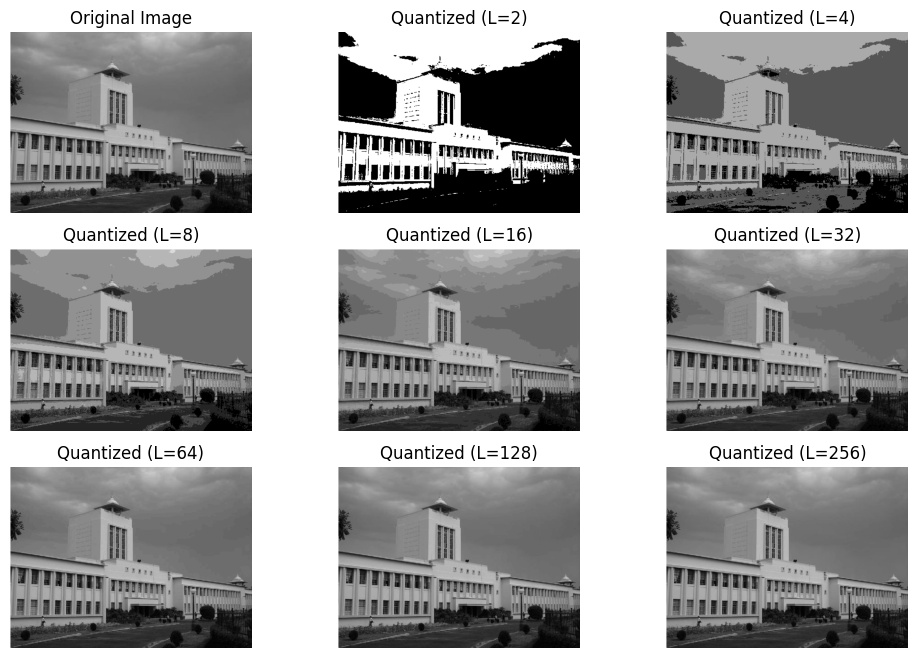

In [98]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.imshow(house, cmap='gray')
plt.axis('off')
plt.title('Original Image')

for i, quantized_image in enumerate(quantized_images):
    plt.subplot(3, 3, i + 2)
    plt.imshow(quantized_image, cmap='gray')
    plt.title(f'Quantized (L={quantization_levels[i]})')
    plt.axis('off')

plt.show()

#Question 2.
Consider Fig.2 and remove the larger object from the image. [Hint: Create a mask and
apply arithmetic operation].

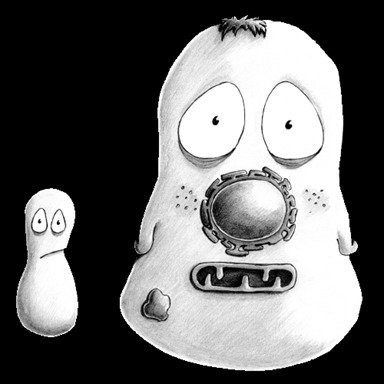

In [99]:
maskv2 = cv2.imread("/content/drive/MyDrive/Daiict/sem2/DIP/lab_1/mask_orig.jpg", cv2.IMREAD_GRAYSCALE)
maskv2.shape

(384, 384)

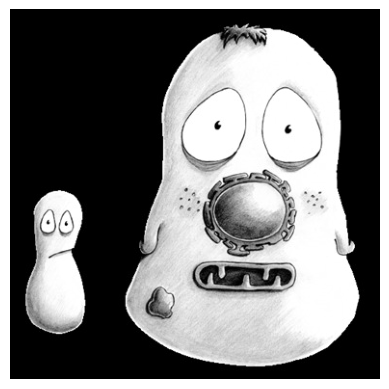

In [100]:
plt.imshow(maskv2,cmap='gray')
plt.axis('off')
plt.show()

In [101]:
_, threshold_mask = cv2.threshold(maskv2, 128, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
larger_contour = max(contours, key=cv2.contourArea)
mask = np.zeros_like(maskv2)
cv2.drawContours(mask, [larger_contour], 0, 255, thickness=cv2.FILLED)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [102]:
cv2.drawContours(mask, [larger_contour], 0, 255, thickness=cv2.FILLED)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [103]:
result_image = cv2.bitwise_and(maskv2, maskv2, mask=cv2.bitwise_not(mask))

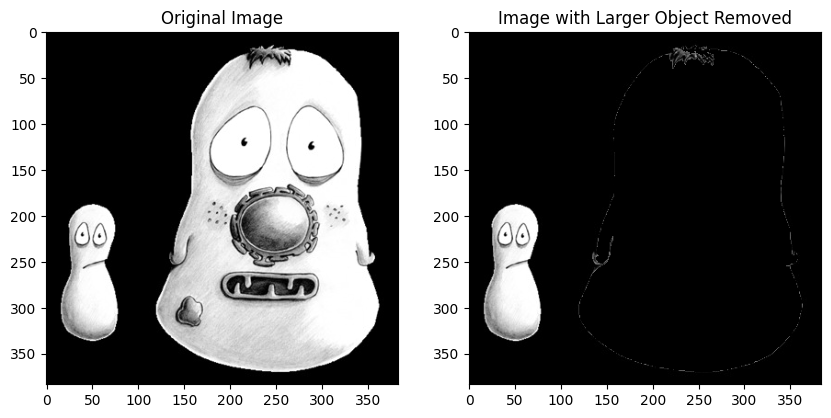

In [104]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(maskv2,cmap='gray' )
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(result_image,cmap='gray')
plt.title('Image with Larger Object Removed')

plt.show()

#Question 3.
Load the image shown in Fig.3. Examine the distinct intensity levels that the image has.
Consider each of the intensity levels as a random variable, and compute the probabilities
of each of the intensity levels. Plot the computed probabilities with respect to the
intensity levels. Now, add constant value 100 with the image of Fig.3, and plot the
probabilities with respect to the intensity levels. Observe the difference between two
plots. What kind of arithmetic operation on the image would shift the probability
distribution towards the left? If you down-sample the given image by a factor 2, and plot
the probability distribution – what will happen?

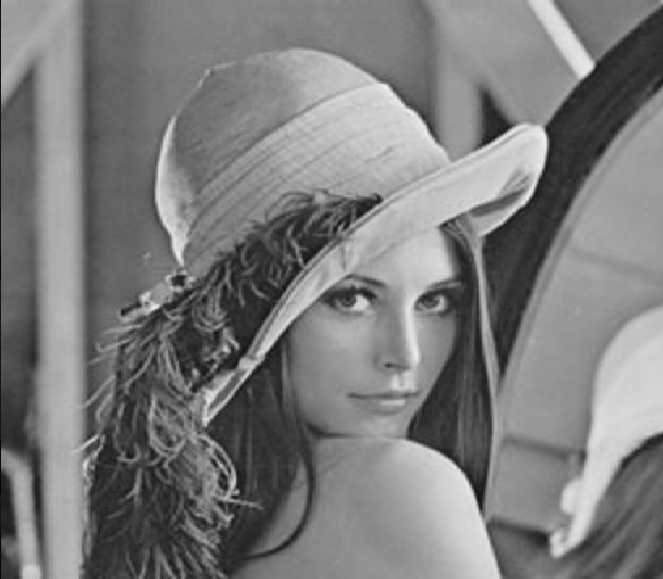

In [105]:
face = cv2.imread("/content/drive/MyDrive/Daiict/sem2/DIP/lab_1/lena_face.jpg", cv2.IMREAD_GRAYSCALE)
face.shape

(579, 663)

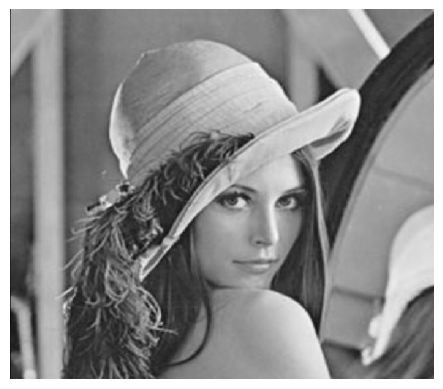

In [106]:
plt.imshow(face,cmap='gray')
plt.axis('off')
plt.show()

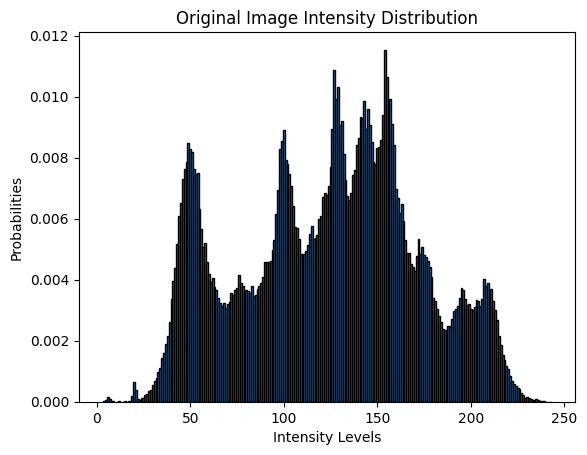

In [107]:
probabilities = [np.sum(face == level) / face.size for level in intensity_levels]

# Plot the probabilities
plt.bar(intensity_levels, probabilities, width=1, edgecolor='black')
plt.title('Original Image Intensity Distribution')
plt.xlabel('Intensity Levels')
plt.ylabel('Probabilities')
plt.show()

In [108]:
face_100=face.astype(int)+100

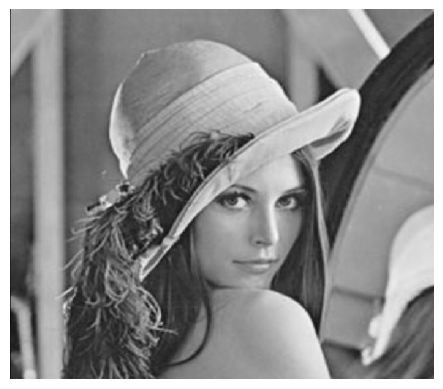

In [109]:
plt.imshow(face_100,cmap='gray')
plt.axis('off')
plt.show()

In [110]:
intensity_levels_100, intensity_counts_100 = np.unique(face_100, return_counts=True)
probabilities_100 = intensity_counts_100 / np.sum(intensity_counts_100)

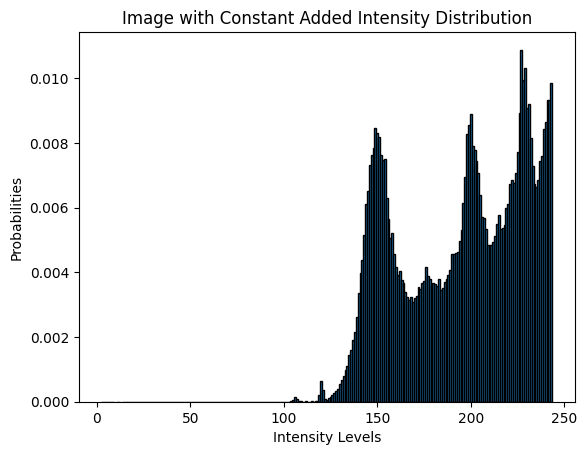

In [111]:
# Compute probabilities for the modified image
probabilities_added_constant = [np.sum(face_100 == level) / face_100.size for level in intensity_levels]

# Plot the new probabilities
plt.bar(intensity_levels, probabilities_added_constant, width=1, edgecolor='black')
plt.title('Image with Constant Added Intensity Distribution')
plt.xlabel('Intensity Levels')
plt.ylabel('Probabilities')
plt.show()


the arithmetic operation on the image that would shift the probability distribution towards the left is subration

In [112]:
face_50=face-25

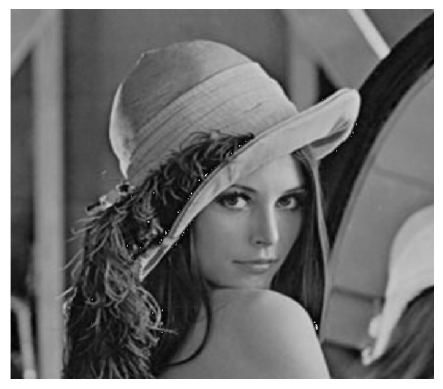

In [113]:
plt.imshow(face_50,cmap='gray')
plt.axis('off')
plt.show()

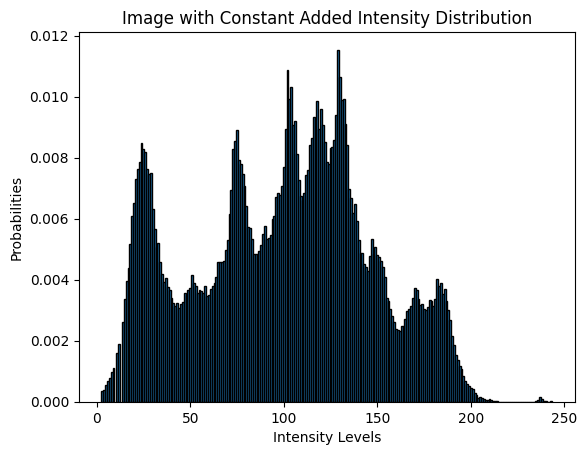

In [114]:
probabilities_added_constant = [np.sum(face_50 == level) / face_50.size for level in intensity_levels]

# Plot the new probabilities
plt.bar(intensity_levels, probabilities_added_constant, width=1, edgecolor='black')
plt.title('Image with Constant Added Intensity Distribution')
plt.xlabel('Intensity Levels')
plt.ylabel('Probabilities')
plt.show()

In [115]:
downsampled_face = cv2.resize(face,None, fx=0.5, fy=0.5)

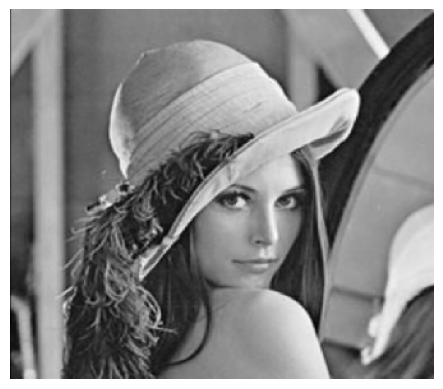

In [116]:
plt.imshow(downsampled_face,cmap='gray')
plt.axis('off')
plt.show()

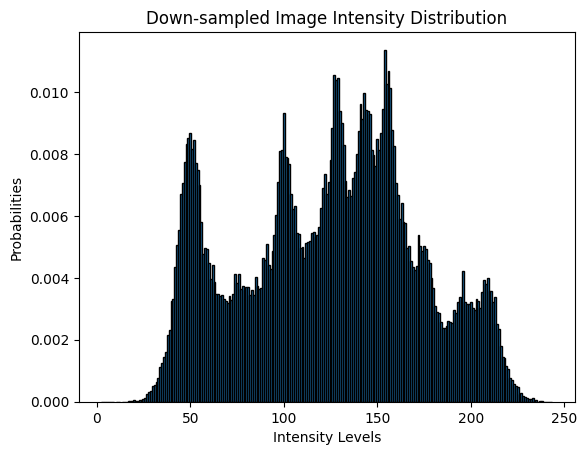

In [117]:
# Compute probabilities for the down-sampled image
probabilities_downsampled = [np.sum(downsampled_face == level) / downsampled_face.size for level in intensity_levels]

# Plot the probabilities for the down-sampled image
plt.bar(intensity_levels, probabilities_downsampled, width=1, edgecolor='black')
plt.title('Down-sampled Image Intensity Distribution')
plt.xlabel('Intensity Levels')
plt.ylabel('Probabilities')
plt.show()


#conclusion

* **Upsampling and Downsampling:** The process of upsampling involves enlarging an image, potentially introducing smoother details. On the other hand, downsampling reduces the size of an image, which may result in the loss of details and information.

* **Quantization Levels:** Lower quantization levels in an image can lead to a coarser approximation, potentially diminishing image quality. Conversely, higher quantization levels, while potentially resulting in larger file sizes, help preserve more information and detail.

* **Object Removal using Masking:** Effective removal of specific elements from an image can be achieved by creating a mask and employing arithmetic operations on it. This technique allows for targeted removal while retaining the rest of the image.

* **Probability Distribution:** The addition of a constant value shifts the probability distribution of an image to the right, while subtraction shifts it to the left. Downsampling, by reducing the number of intensity levels, can also alter the probability distribution, influencing the overall appearance of the image.